# Data Wrangling and Exploration
This notebook demonstrates how comments are downloaded from crypto-related Reddits and scanned for crypto-coin mentions


In [3]:
import sys
sys.path.append('../../reddit')

from crypto_sentiment import CryptoSentimenter

## CryptoSentimenter
The CryptoSentimenter class fetches the top comments from a subreddit group.  Each comment is tokenized with nltk then each word is scanned for a list of the 100 most popular coin names ('btc', 'etc', 'doge', etc.).  Common stop words like 'are', 'as', 'but', 'we', 'an' are skipped.

In [5]:
sentimenter = CryptoSentimenter()
sentimenter.scan('/r/cryptomarkets')
#sentimenter.scan('/r/cryptocurrency')
#sentimenter.scan('/r/cryptocurrencies')
#sentimenter.scan('/r/cryptomoonshots')
#sentimenter.scan('/r/satoshistreetbets')
print('Writing sentiment_summary.csv')
with open('sentiment_summary.csv', 'w+') as f:
    df = sentimenter.get_dataframe()
    df.to_csv(f)

Found 149 coin names
Fetched 49 articles
Writing cryptomarkets_articles.csv
Fetched 13 comments
Fetched 2 comments
Fetched 25 comments
Fetched 35 comments
Fetched 0 comments
Fetched 5 comments
Fetched 0 comments
Fetched 2 comments
Fetched 4 comments
Fetched 14 comments
Fetched 1 comments
Fetched 2 comments
Fetched 1 comments
Fetched 0 comments
Fetched 1 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 4 comments
Fetched 1 comments
Fetched 3 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 3 comments
Fetched 0 comments
Fetched 0 comments
Fetched 3 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 3 comments
Fetched 0 comments
Fetched 0 comments
Fetched 0 comments
Fetched 4 comments
Fetched 1 comments
Fetched 0 comments
Fetched 0 comments
Fetched 1 comments
Fetched 0 comments
Fetched 0 comments
Fetched 3 comments
Fetched 0 comments
Fetched 7 comments
Fetched 

In [7]:
# Show the first few comments
print(df.head(10))

                                                        text     coin  \
id                                                                      
t3_ovnt5w  $45 billion asset manager GoldenTree invests i...  bitcoin   
t3_ovtj47  The Third-Largest Company (By Revenue) in the ...  bitcoin   
t3_ovypx3  Don’t Listen to the Experts Saying Bitcoin Pri...  bitcoin   
t3_ow1c0f  $100K in Bitcoin Up for Grabs as FTX’s MLB Tea...  bitcoin   
t3_ovokm0    Evaluation of institutional interest in Bitcoin  bitcoin   
t3_ovnll5           Bitcoin for Beginners (Common Questions)  bitcoin   
t3_ovn9wo           Bitcoin for Beginners (Common Questions)  bitcoin   
t3_ow7bvr  Best Bitcoin Accounting and Crypto Tax softwar...  bitcoin   
t3_ow7buo               How to get Bitcoin Historical Price?  bitcoin   
t3_ow72lz  Best Bitcoin Accounting and Crypto Tax softwar...  bitcoin   

          sentiment  
id                   
t3_ovnt5w      None  
t3_ovtj47      None  
t3_ovypx3      None  
t3_ow1c0f    

In [29]:
# Show coin counts
stats = df[['text', 'coin']].groupby(['coin']).count()
stats = stats.rename(columns={'text': 'count'})

stats = stats.sort_values('count', ascending=False)
print(stats)

          count
coin           
bitcoin      29
eth          17
btc          15
ethereum     10
one           9
long          6
ada           5
doge          4
tether        4
link          4
cash          4
uniswap       3
xrp           3
bnb           3
white         2
algo          2
sun           2
sol           2
dogecoin      1
sand          1
vet           1
vechain       1
ankr          1
theta         1
atom          1
bch           1
dot           1
neo           1
moon          1
bear          1
grt           1
btt           1
cosmos        1
flux          1
nan           0


Text(0.5, 1.0, 'Coin Counts')

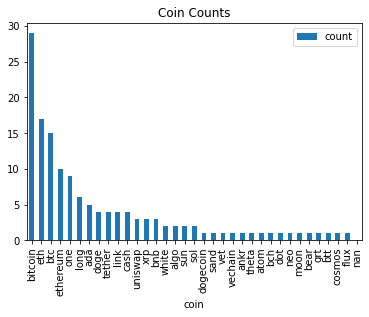

In [30]:
# Plot coin counts
import matplotlib.pyplot as plt
%matplotlib inline

stats.plot.bar()
plt.title('Coin Counts')


## Labeled Data
Using the above methods, 1000 labeled comments were generated at: https://raw.githubusercontent.com/rrmorris2102/ucsd-mle/main/reddit/sentiment_labels_predictions.csv